<a href="https://colab.research.google.com/github/trish-r/102203584_Trish_Rustagi_PyCaret/blob/main/PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install scikit-learn matplotlib

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = {
    'Model': ['LLaMA', 'Falcon', 'Mistral', 'Gemini', 'Claude'],
    'ROUGE Score': [55, 50, 48, 52, 49],
    'METEOR Score': [0.45, 0.42, 0.39, 0.44, 0.41],
    'Inference Time (s)': [1.8, 1.4, 0.9, 1.3, 1.1],
    'Memory Usage (GB)': [10, 8, 7, 9, 8.5]
}

df = pd.DataFrame(data)
df


,Model,ROUGE Score,METEOR Score,Inference Time (s),Memory Usage (GB)
0,LLaMA,55,0.45,1.8,10.0
1,Falcon,50,0.42,1.4,8.0
2,Mistral,48,0.39,0.9,7.0
3,Gemini,52,0.44,1.3,9.0
4,Claude,49,0.41,1.1,8.5


In [7]:
weights = np.array([1, 1, -1, -1])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:], index=df['Model'])
df_normalized


,ROUGE Score,METEOR Score,Inference Time (s),Memory Usage (GB)
Model,,,,
LLaMA,1.692228,1.311220,1.648451,1.5
Falcon,-0.322329,-0.093659,0.329690,-0.5
Mistral,-1.128152,-1.498537,-1.318761,-1.5
Gemini,0.483494,0.842927,0.000000,0.5
Claude,-0.725241,-0.561951,-0.659380,0.0


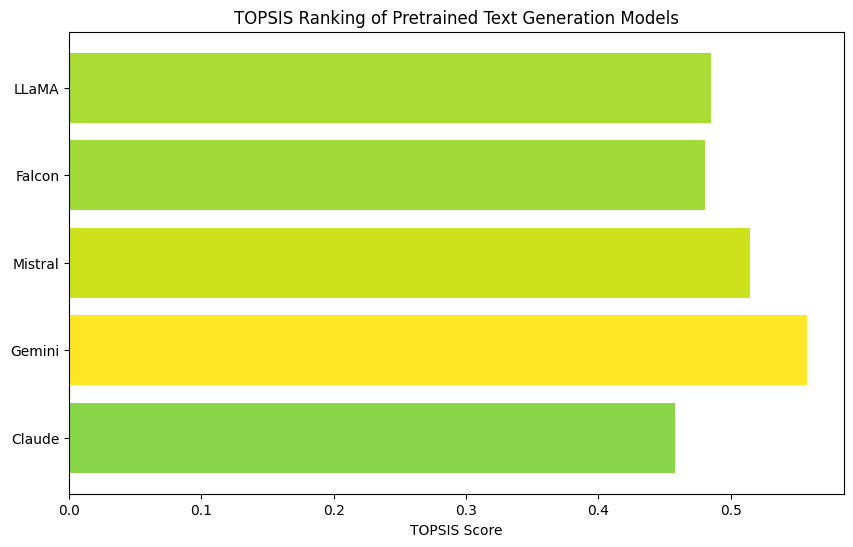


Final Ranked Results:
     Model  TOPSIS Score  Rank
3   Gemini      0.557712   1.0
2  Mistral      0.514536   2.0
0    LLaMA      0.485464   3.0
1   Falcon      0.480822   4.0
4   Claude      0.458289   5.0


In [8]:
weighted_normalized_data = normalized_data * weights
df_weighted_normalized = pd.DataFrame(weighted_normalized_data, columns=df.columns[1:], index=df['Model'])
ideal_best = np.max(weighted_normalized_data, axis=0)
ideal_worst = np.min(weighted_normalized_data, axis=0)

distance_best = np.sqrt(((weighted_normalized_data - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_normalized_data - ideal_worst) ** 2).sum(axis=1))

topsis_scores = distance_worst / (distance_best + distance_worst)

df['TOPSIS Score'] = topsis_scores
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

plt.figure(figsize=(10,6))
plt.barh(df['Model'], df['TOPSIS Score'], color=plt.cm.viridis(topsis_scores / max(topsis_scores)))
plt.xlabel('TOPSIS Score')
plt.title('TOPSIS Ranking of Pretrained Text Generation Models')
plt.gca().invert_yaxis()
plt.show()
print("\nFinal Ranked Results:")
print(df[['Model', 'TOPSIS Score', 'Rank']].sort_values(by='Rank'))
